In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# **Step - 1: Understanding Data :**

In [66]:
fraud_train = pd.read_csv('C:/Users/Yashvi Sharma/Desktop/Financial_Fraud/data/raw/fraudTrain.csv')

In [67]:
fraud_test = pd.read_csv('C:/Users/Yashvi Sharma/Desktop/Financial_Fraud/data/raw/fraudTest.csv')
fraud_test['is_fraud'].unique()

array([0, 1], dtype=int64)

In [68]:
fraud_test, validation = train_test_split(fraud_test, test_size=0.5, random_state=42)
fraud_test.to_csv('C:/Users/Yashvi Sharma/Desktop/Financial_Fraud/data/processed/fraudTest.csv', index=False)
validation.to_csv('C:/Users/Yashvi Sharma/Desktop/Financial_Fraud/data/processed/validation.csv', index=False)
validation_df = pd.read_csv("C:/Users/Yashvi Sharma/Desktop/Financial_Fraud/data/processed/validation.csv")

In [69]:
df = pd.concat([fraud_train,fraud_test])

In [70]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2019-01-01 00:00:18     2703186189652095   
1                1   2019-01-01 00:00:44         630423337322   
2                2   2019-01-01 00:00:51       38859492057661   
3                3   2019-01-01 00:01:16     3534093764340240   
4                4   2019-01-01 00:03:06      375534208663984   
...            ...                   ...                  ...   
110268      110268   2020-07-29 08:13:47      377234009633447   
259178      259178   2020-09-24 15:05:31  4992346398065154184   
365838      365838   2020-11-10 03:23:15     4550599031376731   
131932      131932   2020-08-06 07:26:27      342351256941125   
121958      121958   2020-08-03 02:22:25     2576709887791552   

                                  merchant       category     amt      first  \
0               fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge  entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist       misc_pos   41.96      Tyler   
...                                    ...            ...     ...        ...   
110268        fraud_Rowe, Batz and Goodwin    grocery_pos  104.25    Theresa   
259178    fraud_Koss, Hansen and Lueilwitz           home   89.37   Benjamin   
365838   fraud_Kerluke, Kertzmann and Wiza       misc_net    5.07     Angela   
131932              fraud_Rutherford-Mertz    grocery_pos  201.98    Rebecca   
121958                fraud_McDermott-Rice       misc_pos   66.76     Joseph   

             last gender                        street  ...      lat  \
0           Banks      F                561 Perry Cove  ...  36.0788   
1            Gill      F  43039 Riley Greens Suite 393  ...  48.8878   
2         Sanchez      M      594 White Dale Suite 530  ...  42.1808   
3           White      M   9443 Cynthia Court Apt. 038  ...  46.2306   
4          Garcia      M              408 Bradley Rest  ...  38.4207   
...           ...    ...                           ...  ...      ...   
110268  Blackwell      F        43576 Kristina Islands  ...  39.3716   
259178        Kim      M             920 Patrick Light  ...  41.1730   
365838       West      F             9471 Wong Islands  ...  40.7559   
131932     Obrien      F            5619 Mendoza Inlet  ...  33.1194   
121958     Morgan      M           126 Underwood Drive  ...  33.0067   

            long  city_pop                                  job         dob  \
0       -81.1781      3495            Psychologist, counselling  1988-03-09   
1      -118.2105       149    Special educational needs teacher  1978-06-21   
2      -112.2620      4154          Nature conservation officer  1962-01-19   
3      -112.1138      1939                      Patent attorney  1967-01-12   
4       -79.4629        99       Dance movement psychotherapist  1986-03-28   
...          ...       ...                                  ...         ...   
110268  -77.8229      1925                    Systems developer  1966-02-14   
259178  -89.2187       532               Audiological scientist  1956-01-09   
365838  -82.5123     92985                   Press photographer  1968-05-29   
131932  -83.8235      3343                      Theatre manager  1990-06-08   
121958 -117.0690   1241364  Chartered public finance accountant  1959-08-05   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.

In [71]:
df.drop(df.columns[:1], axis=1, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1574534 entries, 0 to 121958
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1574534 non-null  object 
 1   cc_num                 1574534 non-null  int64  
 2   merchant               1574534 non-null  object 
 3   category               1574534 non-null  object 
 4   amt                    1574534 non-null  float64
 5   first                  1574534 non-null  object 
 6   last                   1574534 non-null  object 
 7   gender                 1574534 non-null  object 
 8   street                 1574534 non-null  object 
 9   city                   1574534 non-null  object 
 10  state                  1574534 non-null  object 
 11  zip                    1574534 non-null  int64  
 12  lat                    1574534 non-null  float64
 13  long                   1574534 non-null  float64
 14  city_pop               1

In [73]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [74]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
print(df.dtypes['trans_date_trans_time'])

datetime64[ns]


In [75]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [76]:
df.nunique()

trans_date_trans_time    1549916
cc_num                       999
merchant                     693
category                      14
amt                        56900
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1574534
unix_time                1549948
merch_lat                1502999
merch_long               1543731
is_fraud                       2
dtype: int64

# **Step - 2: Data pre-processing**

In [78]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  \
0                561 Perry Cove  Moravian Falls  ...   
1  43039 Riley Greens Suite 393          Orient  ...   
2      594 White Dale Suite 530      Malad City  ...   
3   9443 Cynthia Court Apt. 038         Boulder  ...   
4              408 Bradley Rest        Doe Hill  ...   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud trans_hour  trans_day_of_week  trans_year_month  
0        0          0            Tuesday           2019-01  
1        0          0            Tuesday           2019-01  
2        0          0            Tuesday           2019-01  
3        0          0            Tuesday           2019-01  
4        0          0            Tuesday           2019-01  

[5 rows x 25 columns]

In [79]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob']).dt.days / 365.25)

In [80]:
df['age']

0         31.0
1         41.0
2         57.0
3         52.0
4         33.0
          ... 
110268    54.0
259178    65.0
365838    52.0
131932    30.0
121958    61.0
Name: age, Length: 1574534, dtype: float64

In [81]:
df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
df.head()

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt gender                        street            city state    zip  \
0    4.97      F                561 Perry Cove  Moravian Falls    NC  28654   
1  107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  220.11      M      594 White Dale Suite 530      Malad City    ID  83252   
3   45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   41.96      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat  ...                                job  \
0  36.0788  ...          Psychologist, counselling   
1  48.8878  ...  Special educational needs teacher   
2  42.1808  ...        Nature conservation officer   
3  46.2306  ...                    Patent attorney   
4  38.4207  ...     Dance movement psychotherapist   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour  trans_day_of_week  trans_year_month   age  
0         0           0            Tuesday           2019-01  31.0  
1         0           0            Tuesday           2019-01  41.0  
2         0           0            Tuesday           2019-01  57.0  
3         0           0            Tuesday           2019-01  52.0  
4         0           0            Tuesday           2019-01  33.0  

[5 rows x 22 columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1574534 entries, 0 to 121958
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1574534 non-null  int64    
 1   merchant           1574534 non-null  object   
 2   category           1574534 non-null  object   
 3   amt                1574534 non-null  float64  
 4   gender             1574534 non-null  object   
 5   street             1574534 non-null  object   
 6   city               1574534 non-null  object   
 7   state              1574534 non-null  object   
 8   zip                1574534 non-null  int64    
 9   lat                1574534 non-null  float64  
 10  long               1574534 non-null  float64  
 11  city_pop           1574534 non-null  int64    
 12  job                1574534 non-null  object   
 13  trans_num          1574534 non-null  object   
 14  unix_time          1574534 non-null  int64    
 15  merc

In [83]:
df_org = df.copy()

# **Step - 3: Exploratory Data Analysis [EDA]**

In [85]:
df.describe()

cc_num           amt           zip           lat          long  \
count  1.574534e+06  1.574534e+06  1.574534e+06  1.574534e+06  1.574534e+06   
mean   4.176167e+17  7.013410e+01  4.881298e+04  3.853760e+01 -9.023054e+01   
std    1.309379e+18  1.590436e+02  2.689155e+04  5.072353e+00  1.375235e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.574534e+06  1.574534e+06  1.574534e+06  1.574534e+06  1.574534e+06   
mean   8.873142e+04  1.354791e+09  3.853712e+01 -9.023073e+01  5.442245e-03   
std    3.018010e+05  1.685733e+07  5.106513e+00  1.376421e+01  7.357058e-02   
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00   
25%    7.410000e+02  1.340960e+09  3.473508e+01 -9.690241e+01  0.000000e+00   
50%    2.443000e+03  1.354376e+09  3.936519e+01 -8.744392e+01  0.000000e+00   
75%    2.032800e+04  1.368008e+09  4.195539e+01 -8.024094e+01  0.000000e+00   
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00   

         trans_hour           age  
count  1.574534e+06  1.574534e+06  
mean   1.280772e+01  4.615123e+01  
std    6.816289e+00  1.740591e+01  
min    0.000000e+00  1.400000e+01  
25%    7.000000e+00  3.300000e+01  
50%    1.400000e+01  4.400000e+01  
75%    1.900000e+01  5.700000e+01  
max    2.300000e+01  9.600000e+01

In [86]:
100*df.is_fraud.value_counts(normalize=True)

is_fraud
0    99.455775
1     0.544225
Name: proportion, dtype: float64

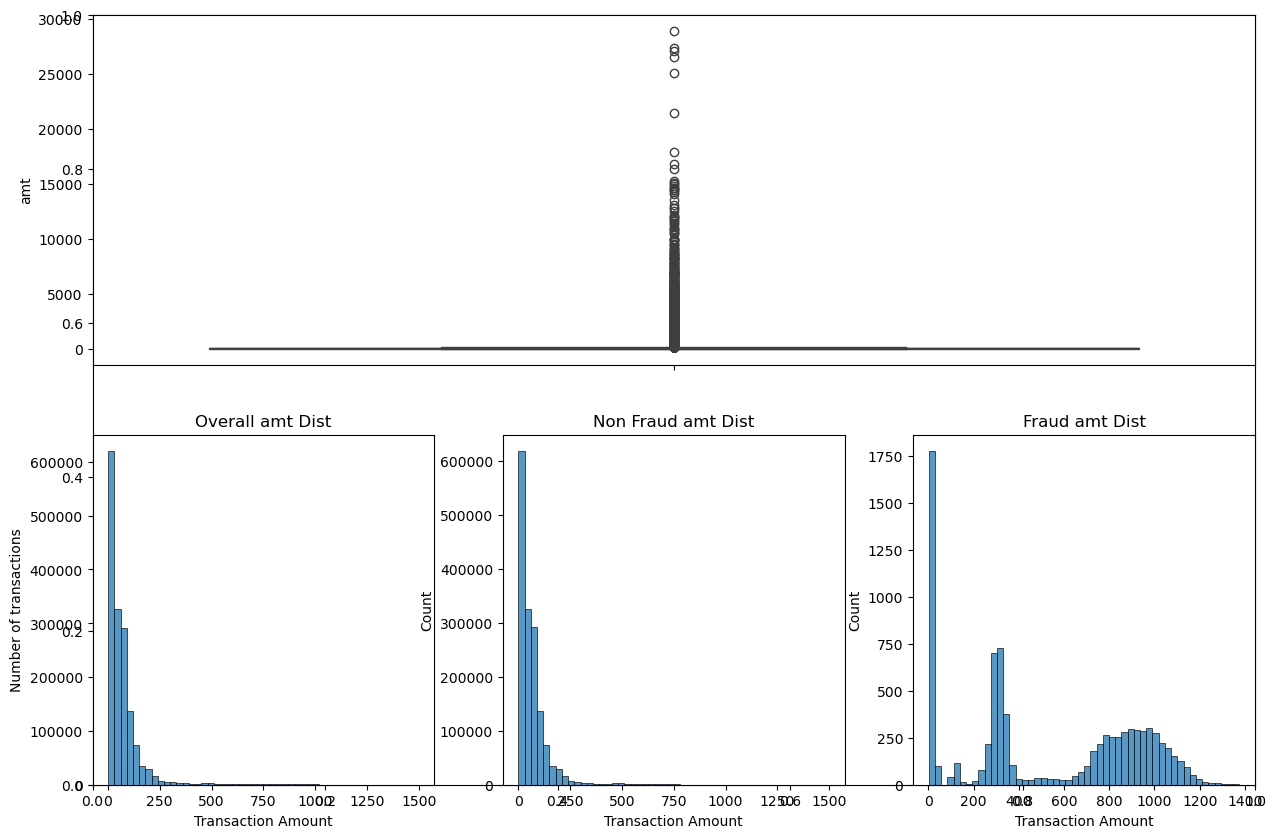

In [87]:
fig = plt.subplots(figsize=(15,10))
plots = []
plots.append(sns.boxplot(df.amt, ax=plt.subplot(211)))
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')
plots[1].set_ylabel('Number of transactions')

plt.show()

##### **Observation ('amt' Feature):**
- The 'amt' feature shows significant outliers, indicating high variance.
- The overall and non-fraud amount distributions are similar, but the fraud amount mean is higher.
- Skewness in the data is evident.

##### **Inference:**
- Despite a higher mean for fraud amounts, they are evenly distributed and often involve smaller values compared to non-fraud transactions.
- Fraud transactions typically occur around 200, **sometimes ranging up to** 400.
- Closer monitoring of small-amount transactions can help detect and prevent credit card fraud.

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\463309281.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\463309281.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)


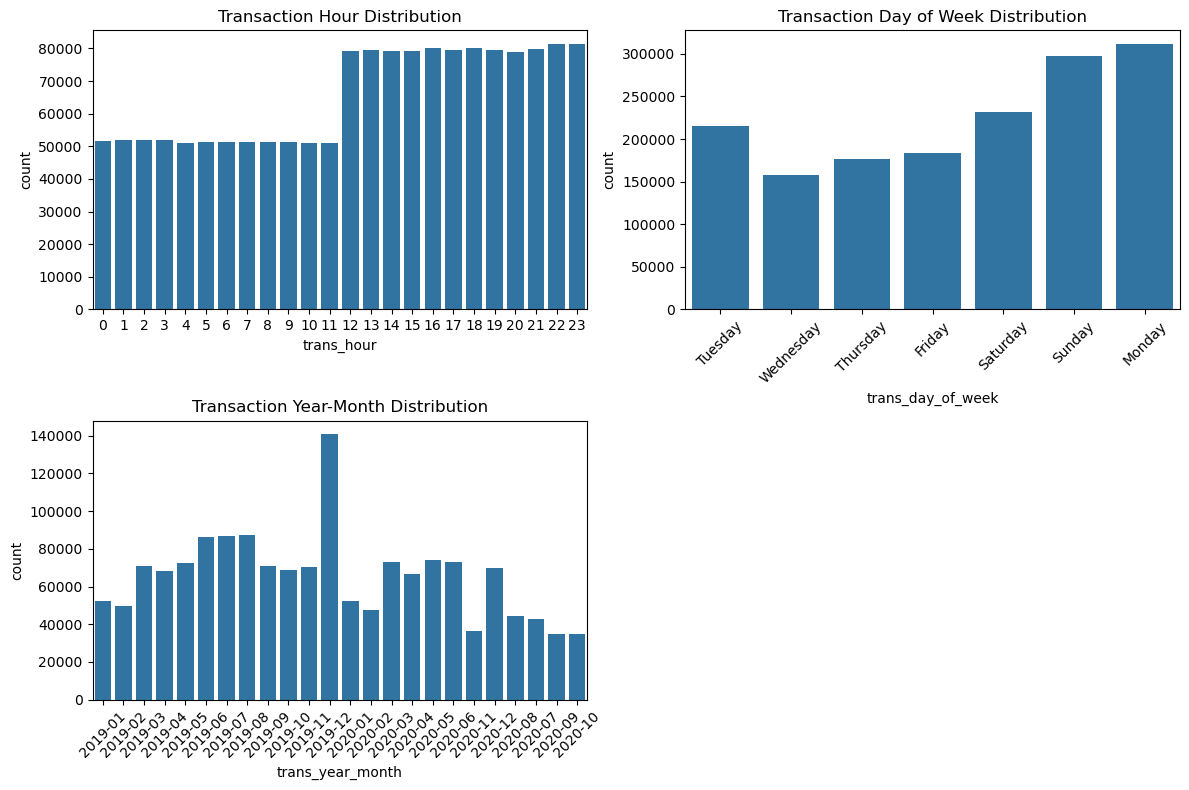

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 
sns.countplot(x=df['trans_hour'], ax=axes[0, 0])
axes[0, 0].set_title("Transaction Hour Distribution")

sns.countplot(x=df['trans_day_of_week'], ax=axes[0, 1])
axes[0, 1].set_title("Transaction Day of Week Distribution")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  

sns.countplot(x=df['trans_year_month'], ax=axes[1, 0])
axes[1, 0].set_title("Transaction Year-Month Distribution")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

fig.delaxes(axes[1, 1])

plt.tight_layout()  
plt.show()


In [90]:
df_timeline01 = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                72873        911
18    2020-07                42864        911
19    2020-08                44318        908
20    2020-09                34819        914
21    2020-10                34683        913
22    2020-11                36257        909
23    2020-12                69792        910

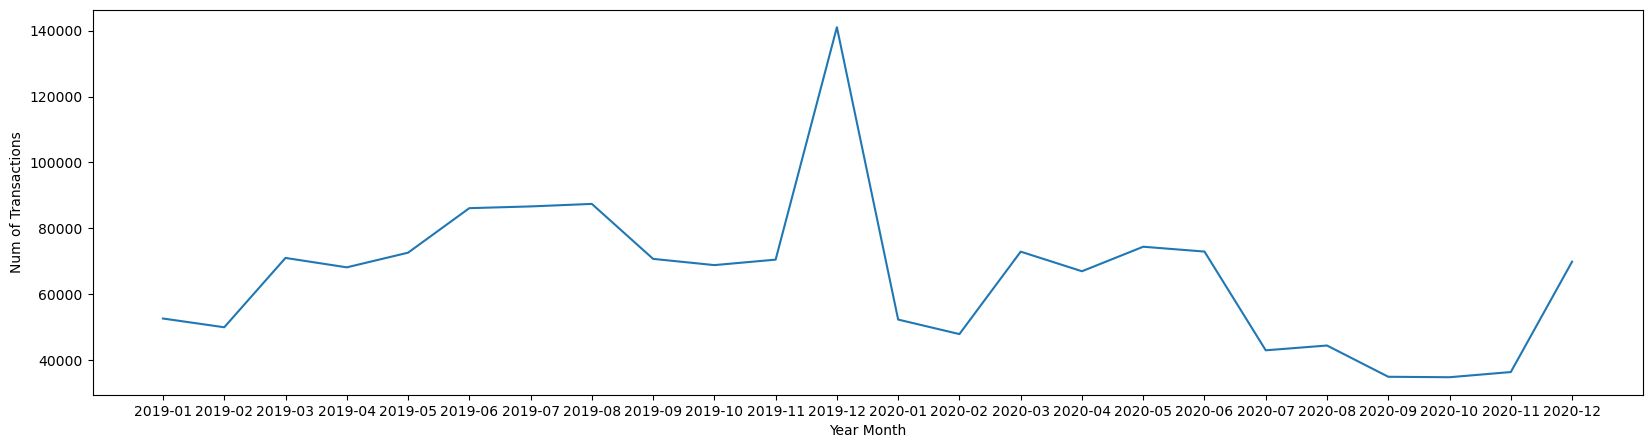

In [91]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [92]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        389               47
18    2020-07                        172               35
19    2020-08                        207               41
20    2020-09                        169               35
21    2020-10                        183               39
22    2020-11                        144               31
23    2020-12                        133               26

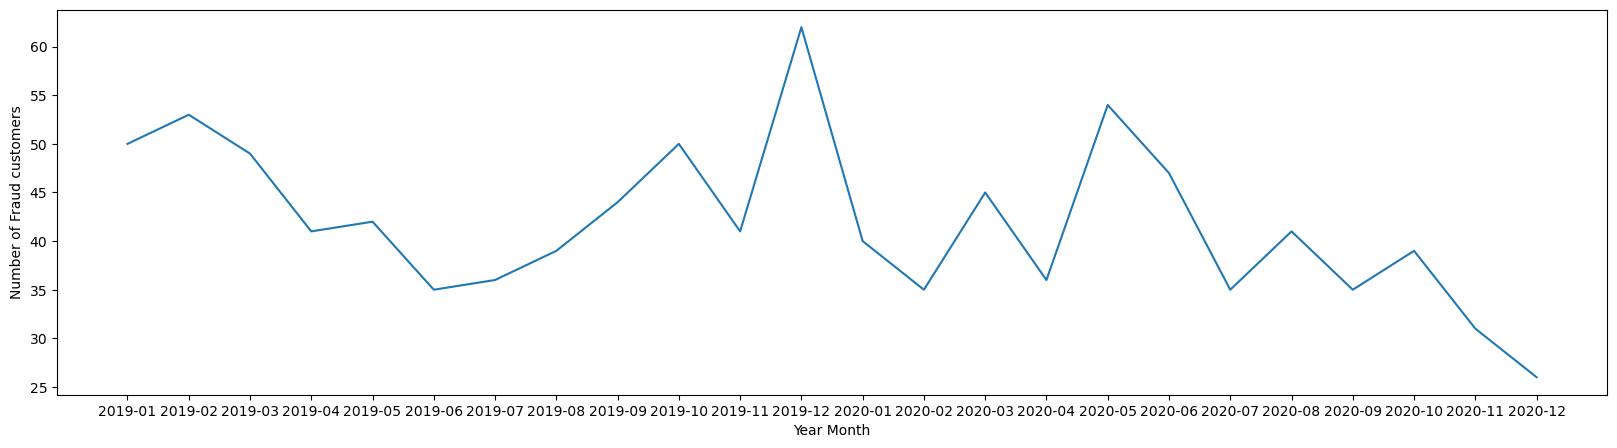

In [93]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

#### **Observation (Time Data):**
- Most transactions occur in the afternoon (after 12 PM) and on Sundays and Mondays.
- Peak transaction months include January, February, October, December 2019, and May 2020.
- Fraud cases and transactions spike in December, coinciding with the holiday season.


C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2595475865.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2595475865.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2595475865.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2595475865.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pl

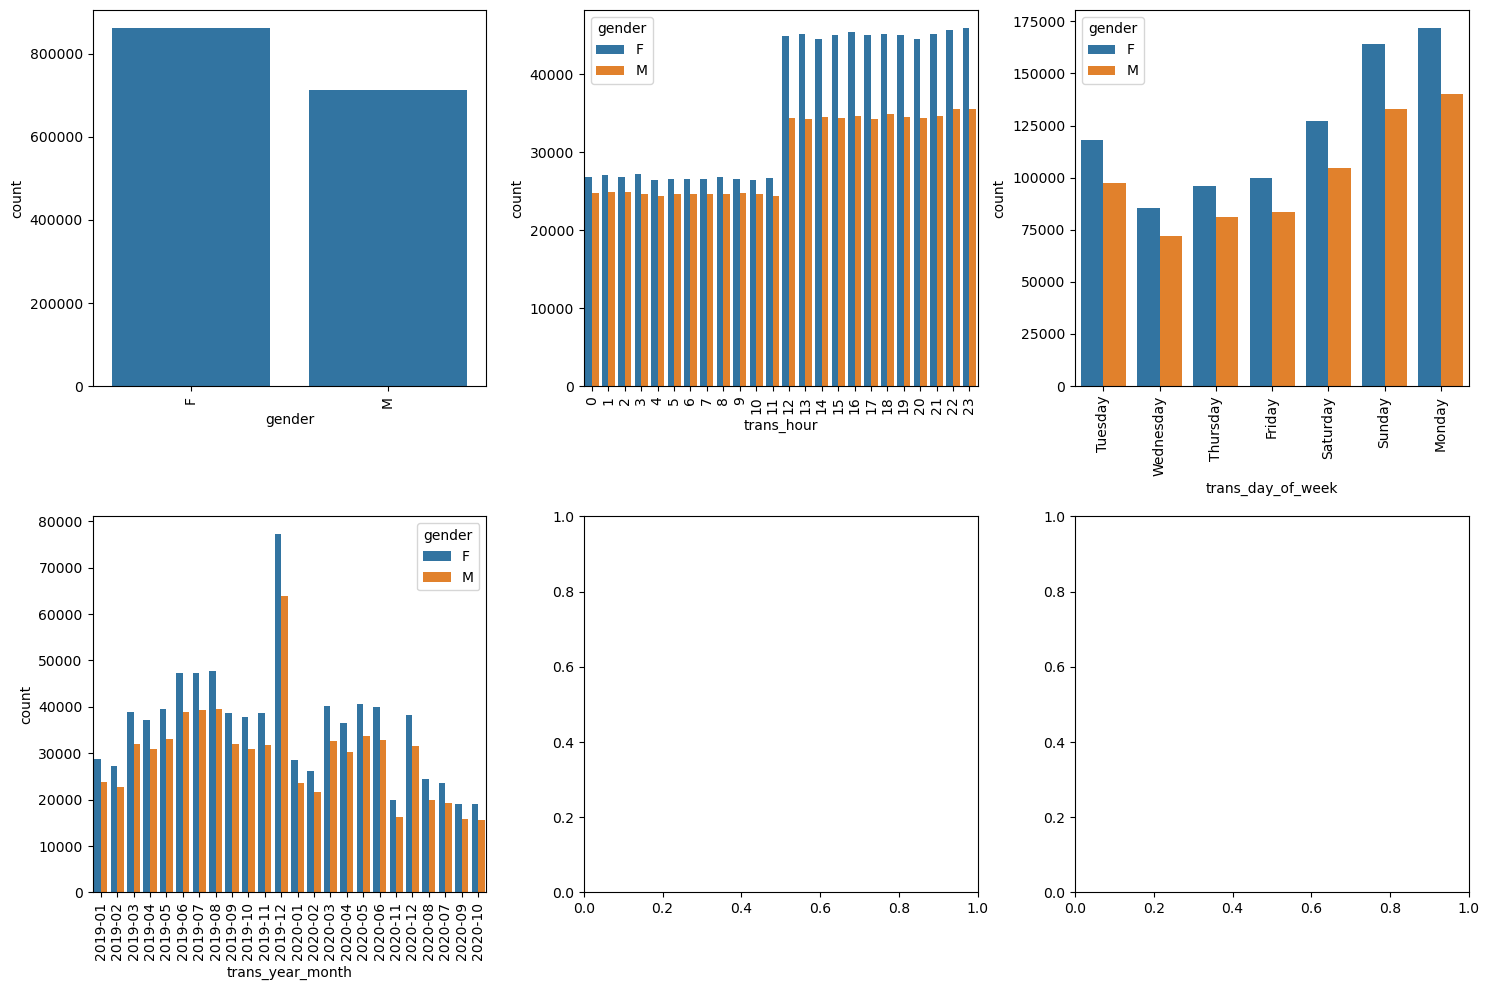

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create all subplots in a grid
axes = axes.flatten()  # Flatten for easy access

# Create a list to store plots
plots = []

# Gender demographic with respect to transactions
plots.append(sns.countplot(data=df, x='gender', ax=axes[0]))

# Transactions over time with respect to gender
plots.append(sns.countplot(data=df, x='trans_hour', hue='gender', ax=axes[1]))
plots.append(sns.countplot(data=df, x='trans_day_of_week', hue='gender', ax=axes[2]))
plots.append(sns.countplot(data=df, x='trans_year_month', hue='gender', ax=axes[3]))

# Rotate x-axis labels for all plots
for plot in plots:
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


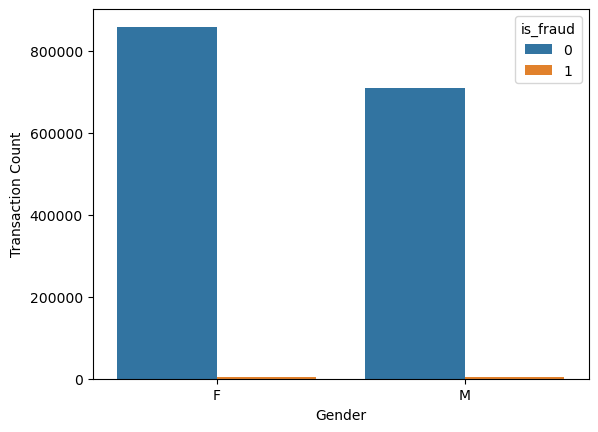

In [96]:
#creating the 'gender' distributed dataframe
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

#creating gender-fraud distribution
df_fraud_gender = df[['gender','trans_num', 'is_fraud']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count']/df_fraud_gender['gender_count'])*100

df_fraud_gender
sns.barplot(data=df_fraud_gender, y='Transaction Count', x='Gender', hue='is_fraud')
plt.show()

Gender-wise Fraud Distribution:


Gender  is_fraud  Transaction_Count  Total_Transactions  Percentage
0      F         0             858224              862551        99.5
1      F         1               4327              862551         0.5
2      M         0             707741              711983        99.4
3      M         1               4242              711983         0.6

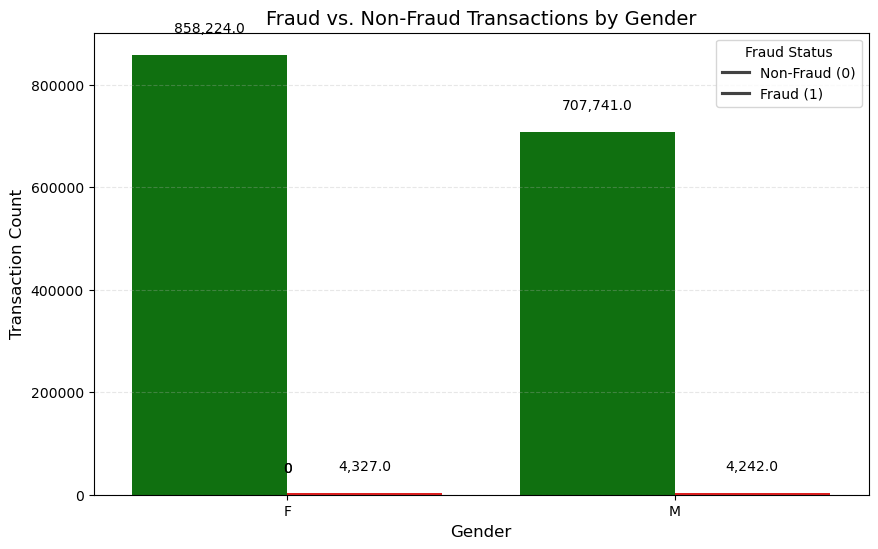

In [97]:
# 1. Gender Distribution (Total Transactions)
df_gender = df[['gender', 'trans_num']].groupby('gender').count().reset_index()
df_gender.columns = ['Gender', 'Total_Transactions']

# 2. Gender-Fraud Distribution (Fraud vs. Non-Fraud)
df_fraud_gender = (
    df[['gender', 'is_fraud', 'trans_num']]
    .groupby(['gender', 'is_fraud'])
    .count()
    .reset_index()
)
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction_Count']

# Merge to calculate percentages
df_fraud_gender = df_fraud_gender.merge(
    df_gender, on='Gender', how='left'
)
df_fraud_gender['Percentage'] = (
    df_fraud_gender['Transaction_Count'] / df_fraud_gender['Total_Transactions'] * 100
).round(2)

# Display the table
print("Gender-wise Fraud Distribution:")
display(df_fraud_gender)

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_fraud_gender,
    x='Gender',
    y='Transaction_Count',
    hue='is_fraud',
    palette={0: 'green', 1: 'red'}  # Non-fraud: green, Fraud: red
)

# Customize plot
plt.title('Fraud vs. Non-Fraud Transactions by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend(title='Fraud Status', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add percentage labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,
        height + 0.05 * df_fraud_gender['Transaction_Count'].max(),
        f'{height:,}',
        ha='center'
    )

plt.show()

##### **Observation:**
- Women contribute the most to transaction frequencies.
- Fraud involvement is 0.52% for women and 0.64% for men relative to their transaction volumes.

In [99]:
#let us first bin the age feature
# for i in range(len(df.age)):
#   if df.age[i] <= 30:
#     df.age[i] = '< 30'
#   elif df.age[i] > 30 and df.age[i] <= 45:
#     df.age[i] = '30-45'
#   elif df.age[i] > 45 and df.age[i] <= 60:
#     df.age[i] = '46-60'
#   elif df.age[i] > 60 and df.age[i] <= 75:
#     df.age[i] = '61-75'
#   else:
#     df.age[i] = '> 75'

# df.age.head()

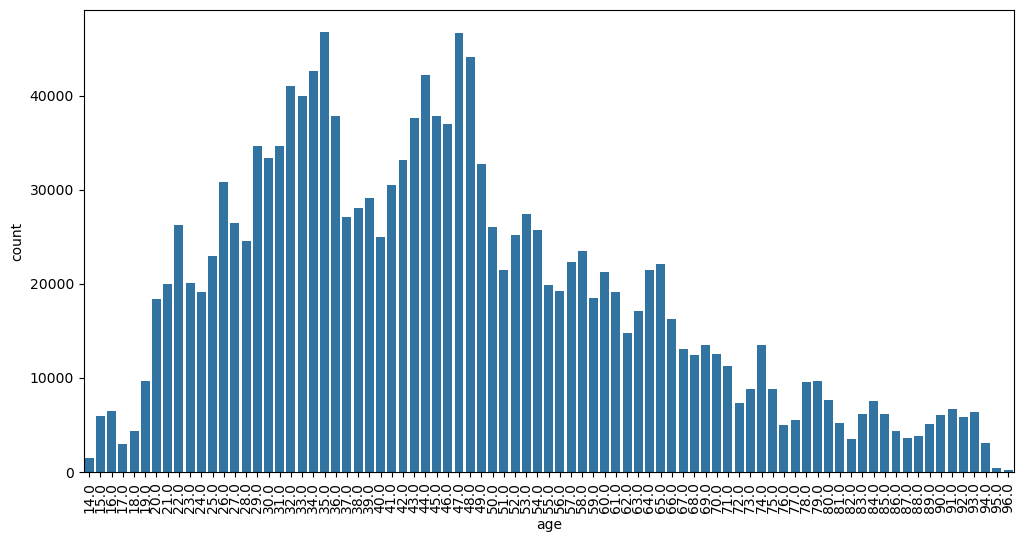

In [100]:
plt.figure(figsize=(12,6))
plot = sns.countplot(data=df, x='age') 
plt.xticks(rotation=90) 
plt.show()

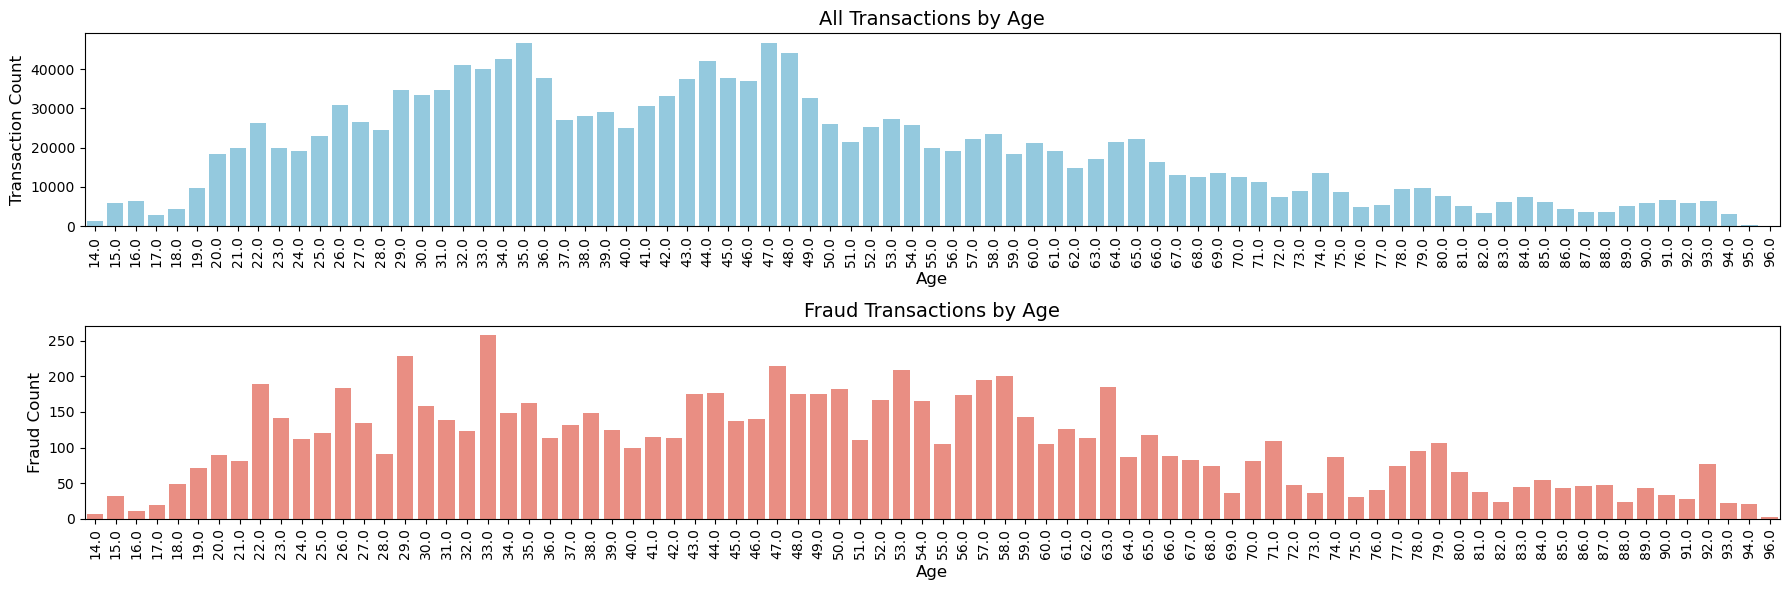

In [101]:
plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)  # 1 row, 2 cols, position 1
ax1 = sns.countplot(data=df, x='age', color='skyblue')
plt.title('All Transactions by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=90)
plt.subplot(2, 1, 2)  # 1 row, 2 cols, position 2
ax2 = sns.countplot(data=df[df['is_fraud'] == 1], x='age', color='salmon')
plt.title('Fraud Transactions by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()  # Prevent overlapping
plt.show()

###### **Observation (Age Groups):**
- The 30-45 age group accounts for the highest number of transactions, followed by the 46-60 age group.
- The >75 age group, while making fewer transactions, has the highest fraud rate (~1% of their transactions are fraudulent).


In [103]:
df.state.nunique()

51

since there are a lot of categories in the 'state' variable of the data, we will now only look at the top 20 states wherein the transaction frequencies are the highest.

In [105]:
high_trans_states = df.state.value_counts().head(20).index.tolist()
print(high_trans_states)

['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO', 'MN', 'AR', 'NC', 'WI', 'SC', 'VA', 'KY', 'IN', 'IA', 'OK']


In [106]:
100*df[df.state.isin(high_trans_states)].state.value_counts(normalize=True)

state
TX    10.984549
NY     9.671531
PA     9.262470
CA     6.538102
OH     5.381688
MI     5.328565
IL     5.021936
FL     4.928088
AL     4.737816
MO     4.460563
MN     3.673724
AR     3.616404
NC     3.500620
WI     3.388841
SC     3.385598
VA     3.379304
KY     3.309108
IN     3.197902
IA     3.141536
OK     3.091655
Name: proportion, dtype: float64

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2094744530.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


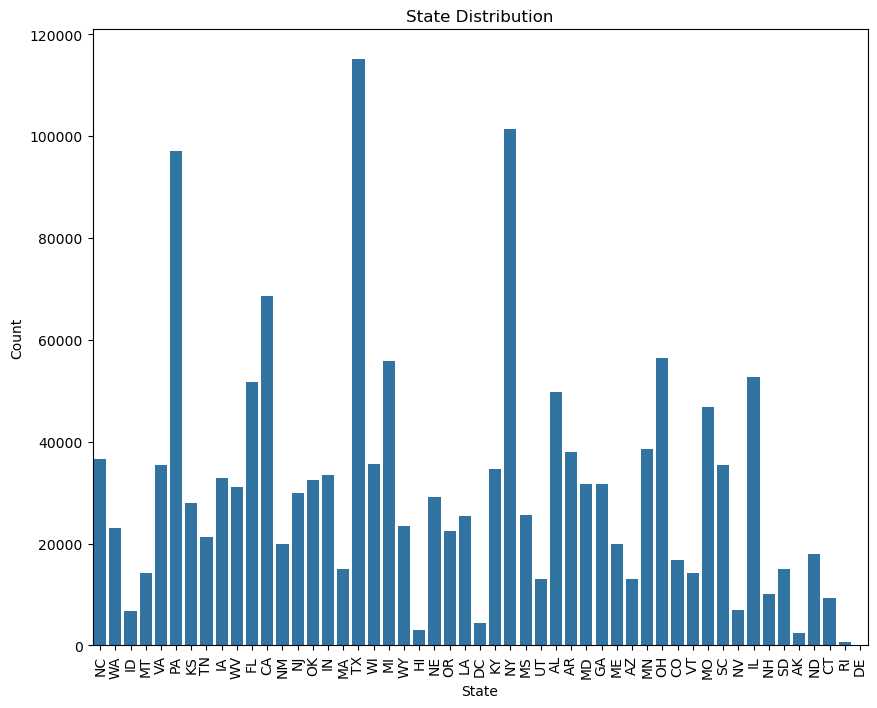

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x=df['state'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel("State")
plt.ylabel("Count")
plt.title("State Distribution")
plt.show()

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\3319515063.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


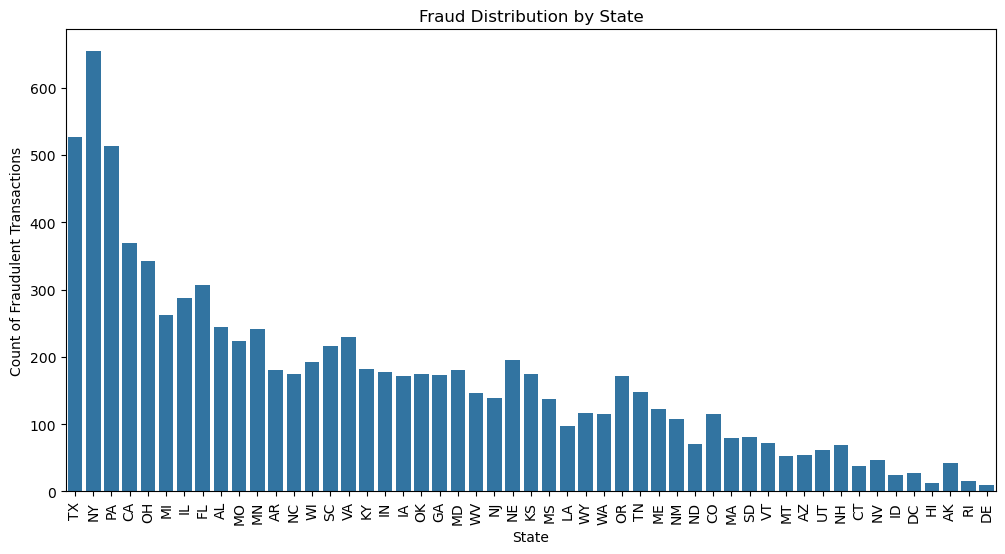

In [108]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=df[df['is_fraud'] == 1]['state'], ax=ax, order=df['state'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.xlabel("State")
plt.ylabel("Count of Fraudulent Transactions")
plt.title("Fraud Distribution by State")
plt.show()


In [109]:
#constructing the state-transaction count distribution
df_state = df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

state  is_fraud  Transaction count  state_count  Transaction percentage
16    DE         1                  9            9              100.000000
78    RI         1                 15          656                2.286585
1     AK         1                 43         2545                1.689587
74    OR         1                172        22517                0.763867
84    TN         1                148        21286                0.695293
60    NH         1                 69        10007                0.689517
66    NV         1                 47         6872                0.683935
11    CO         1                115        16830                0.683304
58    NE         1                195        29241                0.666872
90    VA         1                230        35432                0.649131
68    NY         1                654       101406                0.644932
15    DC         1                 28         4365                0.641466
46    MN         1                241        38519                0.625665
32    KS         1                175        27983                0.625380
42    ME         1                123        19977                0.615708
80    SC         1                216        35498                0.608485
70    OH         1                343        56427                0.607865
18    FL         1                307        51671                0.594144
40    MD         1                180        31762                0.566715
28    IL         1                287        52655                0.545057

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\1843818241.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


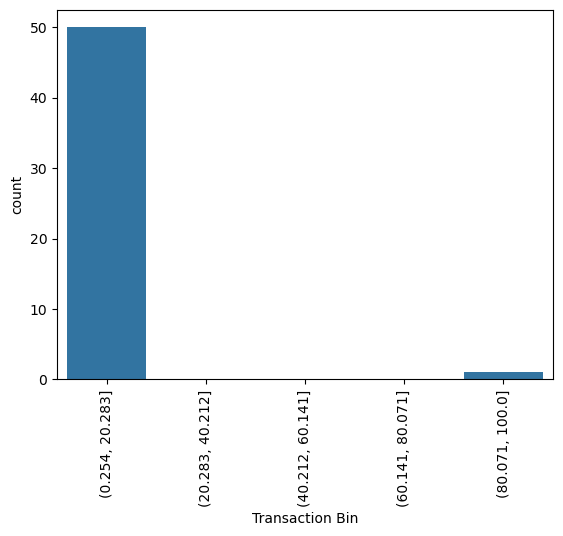

In [110]:
binned_data = pd.cut(df_fraud_state[df_fraud_state.is_fraud == 1]['Transaction percentage'], bins=5)

binned_df = pd.DataFrame({'Transaction Bin': binned_data})

plot = sns.countplot(data=binned_df, x='Transaction Bin')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

In [111]:
#states with more than 75% fraudulent transactions
print('state with more than 75% fraudulent transactions:\n')
print(df_fraud_state.loc[(df_fraud_state.is_fraud == 1) & (df_fraud_state['Transaction percentage'] >= 75)].state)

state with more than 75% fraudulent transactions:

16    DE
Name: state, dtype: object


#### **Observation (State Feature):**
- States like 'PA', 'TX', and 'NY' have the highest transaction volumes, followed by 'FL', 'CA', 'MI', 'AL', 'OH', and 'IL'.
- These states, with high transaction activity, are more prone to fraud through methods like ATM and POS tampering.
- All top 20 states with high transaction volumes have a fraud rate of ~0.5%, with 'DE' being the most fraudulent state.

In [113]:
print('number of cities: ',df.city.nunique())
print('number of zip codes: ',df.zip.nunique())

number of cities:  906
number of zip codes:  985


- Plotting a feature with a high number of unique values is challenging.
- Cities or zip codes with high transaction frequencies are more likely to experience fraud.
- To simplify visualization, we will focus on the top 20 cities and top 20 zip codes with the highest transaction frequencies.

In [115]:
high_trans_cities = df.city.value_counts().head(20).index.tolist()
high_trans_zips = df.zip.value_counts().head(20).index.tolist()
print('high frequencies cities: ', high_trans_cities)
print('high frequencies zip codes: ', high_trans_zips)

high frequencies cities:  ['Birmingham', 'San Antonio', 'Phoenix', 'Utica', 'Meridian', 'Warren', 'Cleveland', 'Thomas', 'Conway', 'Houston', 'Naples', 'Burbank', 'Arcadia', 'Brandon', 'Indianapolis', 'Fulton', 'Dallas', 'Lakeland', 'Allentown', 'Washington']
high frequencies zip codes:  [48088, 34112, 73754, 82514, 29819, 16858, 15484, 6024, 70808, 44233, 85173, 72476, 12419, 5461, 38761, 64019, 72042, 4287, 49628, 76578]


C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\4065395168.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\4065395168.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


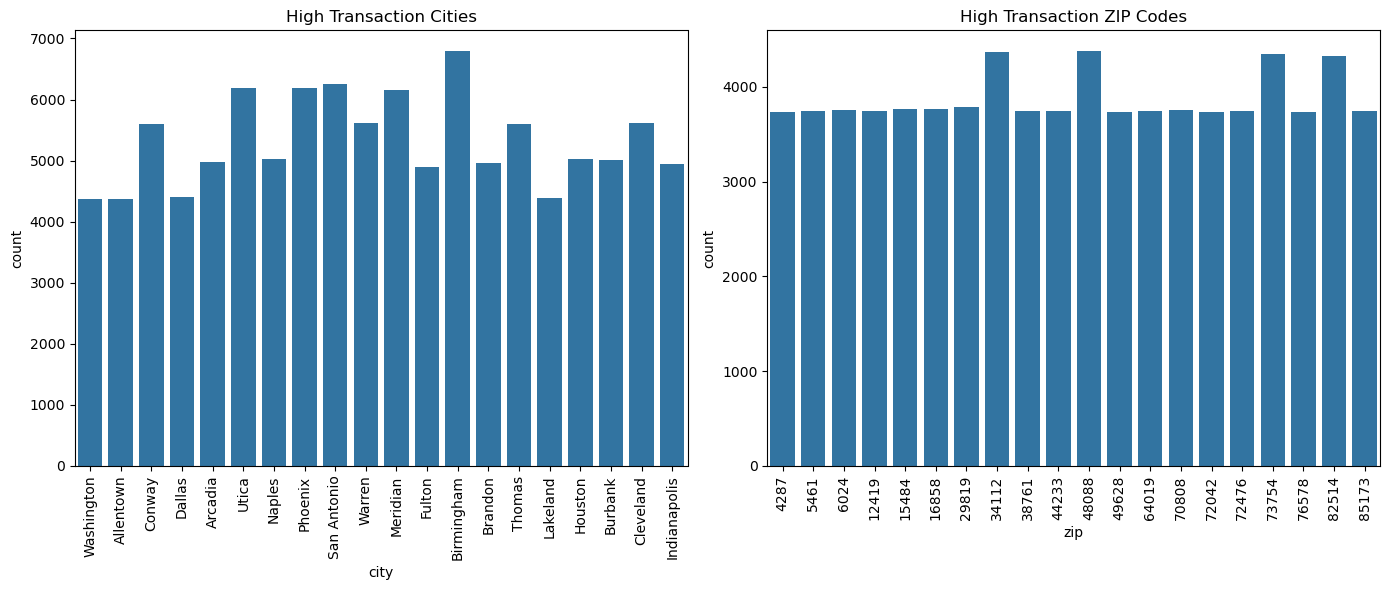

In [116]:
filtered_cities = df[df.city.isin(high_trans_cities)]
filtered_zips = df[df.zip.isin(high_trans_zips)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x="city", data=filtered_cities, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("High Transaction Cities")

sns.countplot(x="zip", data=filtered_zips, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("High Transaction ZIP Codes")

plt.tight_layout()
plt.show()

In [117]:
#constructing the city-transaction count distribution
df_city = df[['city','trans_num']].groupby(['city']).count().reset_index()
df_city.columns = ['city', 'city_count']

#creating the city-fraud distribution
df_fraud_city = df[['city', 'trans_num', 'is_fraud']].groupby(['city','is_fraud']).count().reset_index()
df_fraud_city.columns = ['city', 'is_fraud', 'Transaction count']

df_fraud_city = df_fraud_city.merge(df_city[['city', 'city_count']], how='inner', on='city')

df_fraud_city['Transaction percentage'] = (df_fraud_city['Transaction count']/df_fraud_city['city_count'])*100

#viewing the top 20 cities with high fraudulent transaction volumes
df_fraud_city[df_fraud_city['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

city  is_fraud  Transaction count  city_count  \
808       La Grande         1                 12          12   
1247  Pleasant Hill         1                  8           8   
958         Medford         1                  9           9   
936        Marshall         1                 10          10   
1610     Walkertown         1                 11          11   
1231         Phelps         1                 11          11   
1705      Winnsboro         1                 11          11   
903    Madisonville         1                 11          11   
109          Beacon         1                 11          11   
869        Lockhart         1                  9           9   
987         Mineral         1                 12          12   
265     Chattanooga         1                  7           7   
852       Lexington         1                  5           5   
837       Las Vegas         1                  8           8   
282         Clarion         1                  9           9   
1294     Queen Anne         1                 13          13   
288        Claypool         1                  7           7   
798        Kirtland         1                  7           7   
961        Melville         1                 15          15   
220       Byesville         1                 12          12   

      Transaction percentage  
808                    100.0  
1247                   100.0  
958                    100.0  
936                    100.0  
1610                   100.0  
1231                   100.0  
1705                   100.0  
903                    100.0  
109                    100.0  
869                    100.0  
987                    100.0  
265                    100.0  
852                    100.0  
837                    100.0  
282                    100.0  
1294                   100.0  
288                    100.0  
798                    100.0  
961                    100.0  
220                    100.0

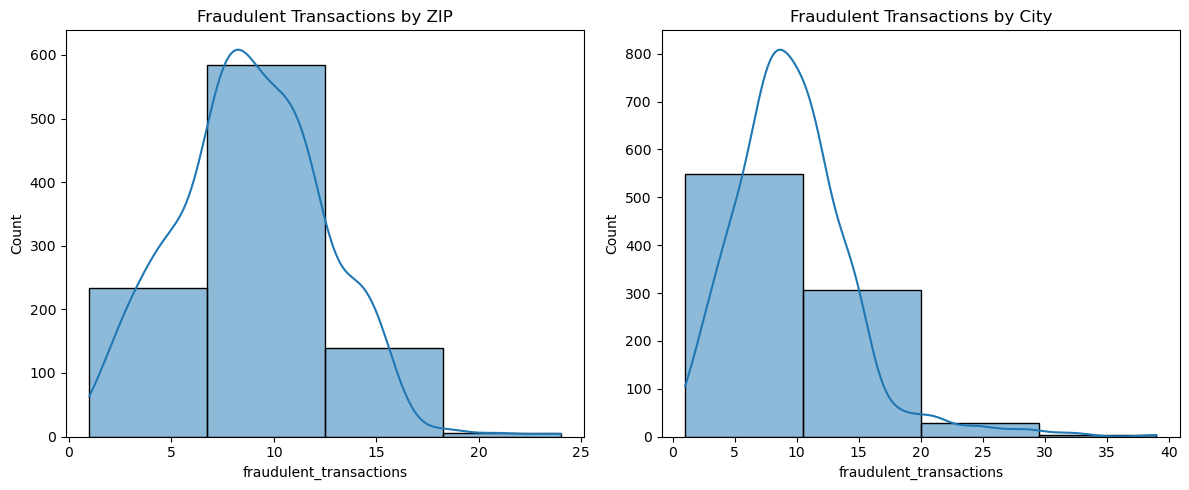

In [118]:
df_fraud_zip = df.groupby(['zip'])['is_fraud'].sum().reset_index()
df_fraud_zip.rename(columns={'is_fraud': 'fraudulent_transactions'}, inplace=True)

df_fraud_city = df.groupby(['city'])['is_fraud'].sum().reset_index()
df_fraud_city.rename(columns={'is_fraud': 'fraudulent_transactions'}, inplace=True)

fraud_zip_filtered = df_fraud_zip[df_fraud_zip['fraudulent_transactions'] > 0]['fraudulent_transactions']
fraud_city_filtered = df_fraud_city[df_fraud_city['fraudulent_transactions'] > 0]['fraudulent_transactions']

if fraud_zip_filtered.empty or fraud_city_filtered.empty:
    print("Warning: No fraudulent transactions found in one of the datasets!")
else:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(fraud_zip_filtered, bins=4, kde=True, ax=axes[0])
    sns.histplot(fraud_city_filtered, bins=4, kde=True, ax=axes[1])

    axes[0].set_title('Fraudulent Transactions by ZIP')
    axes[1].set_title('Fraudulent Transactions by City')

    plt.tight_layout()
    plt.show()

In [119]:
# Compute total transactions per city and per zip
df_total_city = df.groupby('city').size().reset_index(name='total_transactions')
df_total_zip = df.groupby('zip').size().reset_index(name='total_transactions')

# Compute fraudulent transactions per city and zip
df_fraud_city = df[df['is_fraud'] == 1].groupby('city').size().reset_index(name='fraud_transactions')
df_fraud_zip = df[df['is_fraud'] == 1].groupby('zip').size().reset_index(name='fraud_transactions')

# Merge total transactions with fraudulent transactions
df_fraud_city = df_fraud_city.merge(df_total_city, on='city', how='left')
df_fraud_zip = df_fraud_zip.merge(df_total_zip, on='zip', how='left')

# Calculate fraud transaction percentage
df_fraud_city['fraud_percentage'] = (df_fraud_city['fraud_transactions'] / df_fraud_city['total_transactions']) * 100
df_fraud_zip['fraud_percentage'] = (df_fraud_zip['fraud_transactions'] / df_fraud_zip['total_transactions']) * 100

# Filter cities and zip codes with > 75% fraudulent transactions
high_fraud_cities = df_fraud_city.loc[df_fraud_city['fraud_percentage'] >= 75, 'city'].tolist()
high_fraud_zips = df_fraud_zip.loc[df_fraud_zip['fraud_percentage'] >= 75, 'zip'].tolist()

# Print results
print('Cities with more than 75% fraudulent transactions:\n', high_fraud_cities)
print('\nZip codes with more than 75% fraudulent transactions:\n', high_fraud_zips)


Cities with more than 75% fraudulent transactions:
 ['Angwin', 'Ashland', 'Beacon', 'Brookfield', 'Bruce', 'Buellton', 'Byesville', 'Chattanooga', 'Clarion', 'Claypool', 'Clinton', 'Coulee Dam', 'Craig', 'Crouse', 'Downey', 'East China', 'Freeport', 'Gaines', 'Granbury', 'Greenport', 'Grenola', 'Grifton', 'Guthrie', 'Hubbell', 'Irvington', 'Isanti', 'Kaktovik', 'Karns City', 'Kirkwood', 'Kirtland', 'La Grande', 'Las Vegas', 'Lexington', 'Lockhart', 'Madisonville', 'Marshall', 'Medford', 'Melville', 'Mineral', 'Morrowville', 'Morven', 'Moss Point', 'Mount Vernon', 'Mountain City', 'Nanuet', 'Nicholson', 'Noblesville', 'Norfolk', 'North East', 'Oakton', 'Orange Park', 'Phelps', 'Pleasant Hill', 'Queen Anne', 'Rice', 'Ridge Spring', 'Roland', 'Seattle', 'Seligman', 'Senatobia', 'Springville', 'Streator', 'Vacaville', 'Walkertown', 'Wappapello', 'Wartburg', 'Waukau', 'West Frankfort', 'Wever', 'Winnsboro']

Zip codes with more than 75% fraudulent transactions:
 [4032, 10018, 10533, 10553, 

##### **Observation ('city' and 'zip' Features):**
- The plots highlight cities and zip codes with the highest transaction frequencies.
- These areas are among the busiest globally, justifying their high transaction volumes.
- Approximately 50 zip codes and 70 cities have over 75% fraudulent transactions.


In [121]:
df.job.nunique()

497

- Similar to the 'city' and 'zip' features, the 'job' feature too has a lot of unique values which make it difficult for us to visualize and analyse the feature.
- Therefore, we will now only look at the top 20 jobs, people from which are transacting in high frequencies.

In [123]:
#fetching top 20 jobs with high transaction frequencies
high_trans_jobs = df.job.value_counts().head(20).index.tolist()
print(high_trans_jobs)

['Film/video editor', 'Exhibition designer', 'Surveyor, land/geomatics', 'Naval architect', 'Designer, ceramics/pottery', 'Materials engineer', 'Financial adviser', 'IT trainer', 'Systems developer', 'Environmental consultant', 'Scientist, audiological', 'Chartered public finance accountant', 'Copywriter, advertising', 'Chief Executive Officer', 'Comptroller', 'Sub', 'Podiatrist', 'Agricultural consultant', 'Paramedic', 'Magazine features editor']


In [124]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']
df_fraud_job = df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Transaction percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

job  is_fraud  Transaction count  \
475                   Industrial buyer         1                 10   
99                Broadcast journalist         1                  9   
340                    Engineer, water         1                  5   
68      Armed forces technical officer         1                  8   
827                        Ship broker         1                  7   
834                  Software engineer         1                  5   
837                          Solicitor         1                 11   
39              Air traffic controller         1                 17   
651                  Personnel officer         1                 12   
393            Forest/woodland manager         1                  9   
624      Operational investment banker         1                  4   
335                     Engineer, site         1                 12   
796  Sales promotion account executive         1                 14   
207         Contracting civil engineer         1                  7   
444                          Homeopath         1                 11   
118                    Careers adviser         1                 15   
228                             Dancer         1                 19   
521                    Legal secretary         1                 12   
947                 Veterinary surgeon         1                  8   
956                  Warehouse manager         1                  7   

     job_count  Transaction percentage  
475         10                   100.0  
99           9                   100.0  
340          5                   100.0  
68           8                   100.0  
827          7                   100.0  
834          5                   100.0  
837         11                   100.0  
39          17                   100.0  
651         12                   100.0  
393          9                   100.0  
624          4                   100.0  
335         12                   100.0  
796         14                   100.0  
207          7                   100.0  
444         11                   100.0  
118         15                   100.0  
228         19                   100.0  
521         12                   100.0  
947          8                   100.0  
956          7                   100.0

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\1838714985.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


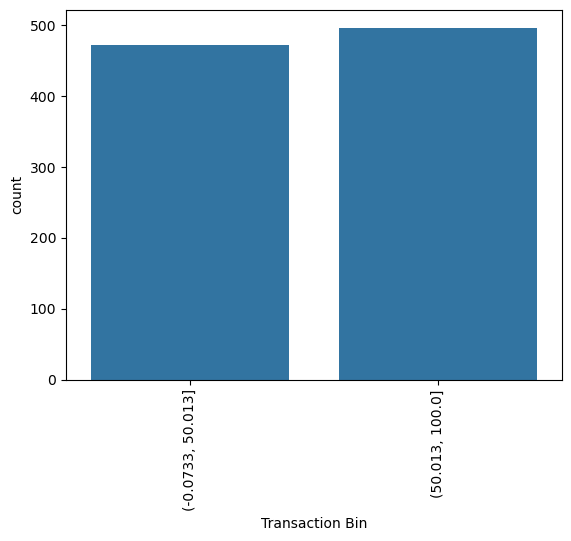

In [125]:
cut_data = pd.cut(df_fraud_job['Transaction percentage'], bins=2)
cut_df = pd.DataFrame({'Transaction Bin': cut_data})
plot = sns.countplot(x='Transaction Bin', data=cut_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [126]:
df_fraud_job.loc[(df_fraud_job.is_fraud == 1) & (df_fraud_job['Transaction percentage'] >= 50)].job

2                  Accountant, chartered
39                Air traffic controller
68        Armed forces technical officer
99                  Broadcast journalist
118                      Careers adviser
207           Contracting civil engineer
228                               Dancer
335                       Engineer, site
340                      Engineer, water
393              Forest/woodland manager
444                            Homeopath
475                     Industrial buyer
478                  Information officer
521                      Legal secretary
624        Operational investment banker
651                    Personnel officer
796    Sales promotion account executive
827                          Ship broker
834                    Software engineer
837                            Solicitor
947                   Veterinary surgeon
956                    Warehouse manager
Name: job, dtype: object

##### **Observation ('job' Feature):**
- High transaction frequencies are noted in specific job roles.
- Jobs like Armed Forces Technical Officer, Engineer (Site), Information Officer, Legal Secretary, and others listed have *completely fraudulent transactions*.

In [128]:
df.category.value_counts(normalize=True)

category
gas_transport     0.101553
grocery_pos       0.095127
home              0.094776
shopping_pos      0.089911
kids_pets         0.087364
shopping_net      0.075135
entertainment     0.072378
food_dining       0.070606
personal_care     0.070164
health_fitness    0.066174
misc_pos          0.061631
misc_net          0.048909
grocery_net       0.035001
travel            0.031271
Name: proportion, dtype: float64

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\3186962843.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


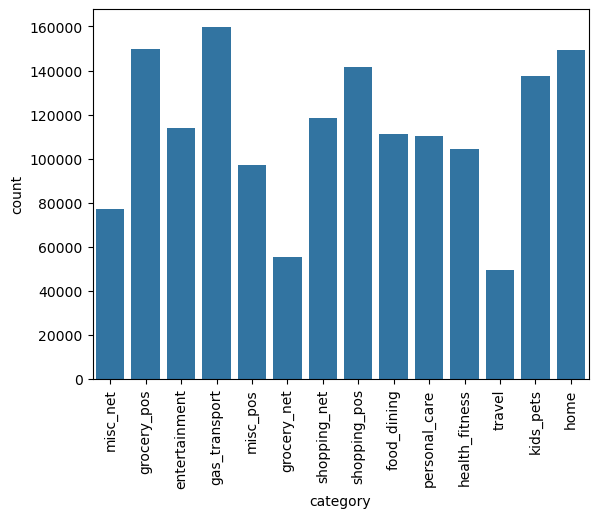

In [129]:
df['category'] = df['category'].astype(str)
plot = sns.countplot(x='category', data=df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [130]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)

category  is_fraud  Transaction count  category_count  \
23    shopping_net         1               1969          118302   
17        misc_net         1               1044           77009   
9      grocery_pos         1               1997          149780   
25    shopping_pos         1                949          141568   
5    gas_transport         1                687          159898   
19        misc_pos         1                284           97040   
27          travel         1                137           49238   
7      grocery_net         1                150           55111   
21   personal_care         1                257          110476   
1    entertainment         1                262          113961   
15       kids_pets         1                272          137558   
3      food_dining         1                174          111172   
13            home         1                228          149228   
11  health_fitness         1                159          104193   

    Transaction percentage  
23                1.664384  
17                1.355686  
9                 1.333289  
25                0.670349  
5                 0.429649  
19                0.292663  
27                0.278240  
7                 0.272178  
21                0.232630  
1                 0.229903  
15                0.197735  
3                 0.156514  
13                0.152786  
11                0.152601

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2866042641.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


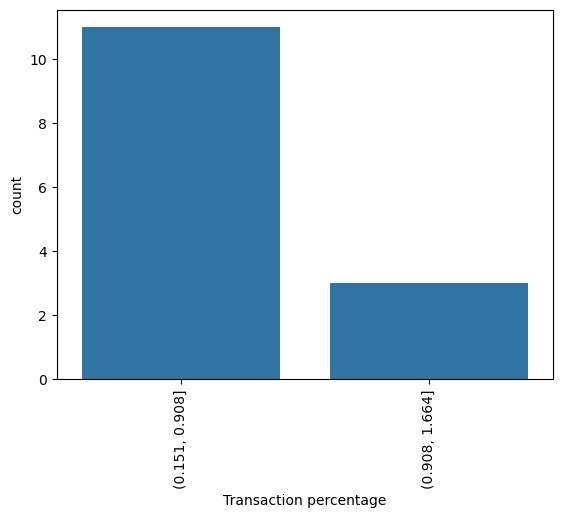

In [131]:
fraud_data = df_fraud_category[df_fraud_category.is_fraud == 1]['Transaction percentage']
if fraud_data.empty:
    print("Error: No fraudulent transactions found!")
else:
    fraud_bins = pd.cut(fraud_data, bins=2)
   
    fraud_bins = fraud_bins.astype(str)
    plot = sns.countplot(x=fraud_bins)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

In [132]:
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 1)].category

9      grocery_pos
17        misc_net
23    shopping_net
Name: category, dtype: object

In [133]:
df_fraud_category.head()

category  is_fraud  Transaction count  category_count  \
0  entertainment         0             113699          113961   
1  entertainment         1                262          113961   
2    food_dining         0             110998          111172   
3    food_dining         1                174          111172   
4  gas_transport         0             159211          159898   

   Transaction percentage  
0               99.770097  
1                0.229903  
2               99.843486  
3                0.156514  
4               99.570351

#### **Observation ('category' Feature):**
- Three categories—grocery_pos, misc_net, and shopping_net—have over 1% fraudulent transactions, with shopping_net having the highest number of fraud cases.

#### **Inference:**
- The shopping_net category is particularly vulnerable to fraud, possibly due to compromised transaction systems or mechanisms used by fraudsters.
- These categories (grocery_pos, misc_net, shopping_net) should be thoroughly investigated and monitored to reduce fraudulent activities and improve transaction security.

In [135]:
df.merchant.nunique()

693

In [136]:
high_trans_merchants = df.merchant.value_counts().head(20).index.tolist()
high_trans_merchants

['fraud_Kilback LLC',
 'fraud_Cormier LLC',
 'fraud_Schumm PLC',
 'fraud_Kuhn LLC',
 'fraud_Boyer PLC',
 'fraud_Dickinson Ltd',
 'fraud_Kutch LLC',
 'fraud_Cummerata-Jones',
 'fraud_Kling Inc',
 'fraud_Rodriguez Group',
 'fraud_Olson, Becker and Koch',
 'fraud_Emard Inc',
 'fraud_Stroman, Hudson and Erdman',
 'fraud_Prohaska-Murray',
 'fraud_Erdman-Kertzmann',
 'fraud_Bartoletti-Wunsch',
 'fraud_Friesen-Stamm',
 'fraud_Jenkins, Hauck and Friesen',
 'fraud_Brekke and Sons',
 'fraud_Berge LLC']

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\204432241.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


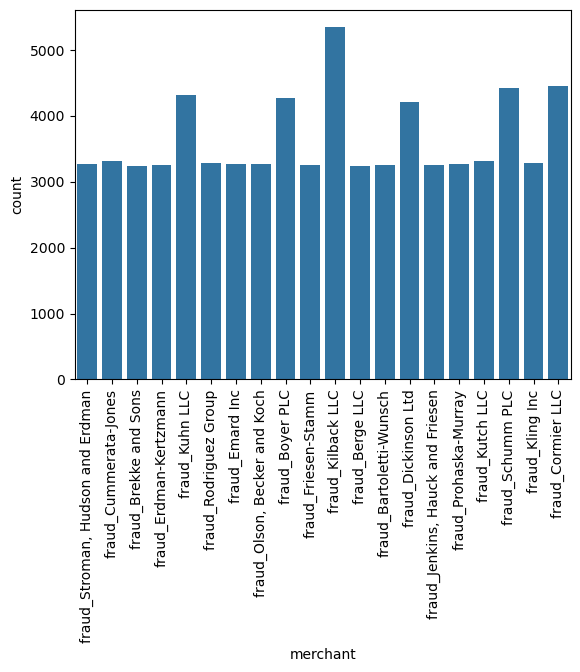

In [137]:
filtered_df = df[df.merchant.isin(high_trans_merchants)]
plot = sns.countplot(x=filtered_df.merchant)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [138]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['merchant', 'merchant_count']
df_fraud_merchant = df[['merchant', 'trans_num', 'is_fraud']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['merchant', 'is_fraud', 'Transaction count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['merchant', 'merchant_count']], how='inner', on='merchant')

df_fraud_merchant['Transaction percentage'] = (df_fraud_merchant['Transaction count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)

merchant  is_fraud  Transaction count  \
673                            fraud_Kozey-Boehm         1                 53   
490            fraud_Herman, Treutel and Dickens         1                 35   
607                        fraud_Kerluke-Abshire         1                 47   
743         fraud_Langworth, Boehm and Gulgowski         1                 48   
563                               fraud_Jast Ltd         1                 47   
145                         fraud_Boyer-Reichert         1                 45   
1224                            fraud_Terry-Huel         1                 47   
401                            fraud_Goyette Inc         1                 45   
387                     fraud_Gleason-Macejkovic         1                 46   
1049  fraud_Romaguera, Cruickshank and Greenholt         1                 44   
476          fraud_Heathcote, Yost and Kertzmann         1                 44   
693                fraud_Kuhic, Bins and Pfeffer         1                 45   
159                              fraud_Brown PLC         1                 27   
1103         fraud_Schmeler, Bashirian and Price         1                 44   
733              fraud_Labadie, Treutel and Bode         1                 43   
691                              fraud_Kuhic LLC         1                 44   
884          fraud_Mosciski, Ziemann and Farrell         1                 44   
771                          fraud_Lemke-Gutmann         1                 43   
866               fraud_Moore, Dibbert and Koepp         1                 28   
984                           fraud_Rau and Sons         1                 54   

      merchant_count  Transaction percentage  
673             2340                2.264957  
490             1585                2.208202  
607             2243                2.095408  
743             2375                2.021053  
563             2356                1.994907  
145             2312                1.946367  
1224            2417                1.944559  
401             2359                1.907588  
387             2444                1.882160  
1049            2359                1.865197  
476             2360                1.864407  
693             2428                1.853377  
159             1465                1.843003  
1103            2393                1.838696  
733             2344                1.834471  
691             2401                1.832570  
884             2405                1.829522  
771             2360                1.822034  
866             1566                1.787995  
984             3024                1.785714

C:\Users\Yashvi Sharma\AppData\Local\Temp\ipykernel_11948\2938568713.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)


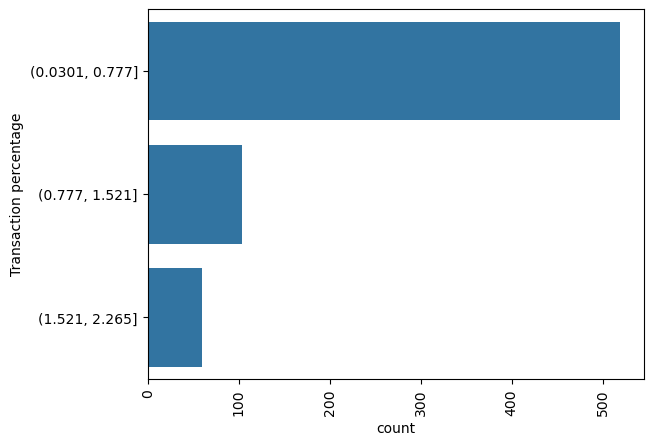

In [139]:
plot = sns.countplot(pd.cut(df_fraud_merchant[df_fraud_merchant.is_fraud == 1]['Transaction percentage'], bins = 3))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

In [140]:
len(df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 1)].merchant)

140

In [141]:
df_fraud_merchant.loc[(df_fraud_merchant.is_fraud == 1) & (df_fraud_merchant['Transaction percentage'] >= 2)].merchant

490       fraud_Herman, Treutel and Dickens
607                   fraud_Kerluke-Abshire
673                       fraud_Kozey-Boehm
743    fraud_Langworth, Boehm and Gulgowski
Name: merchant, dtype: object

##### **Observation ('merchant' Feature):**
- About 140 merchants have over 1% of their transactions flagged as fraudulent.
- Top merchants with the highest fraudulent transactions include fraud_Brown PLC, fraud_Goyette Inc, fraud_Herman, Treutel and Dickens, fraud_Jast Ltd, fraud_Kerluke-Abshire, fraud_Kozey-Boehm, fraud_Schmeler, Bashirian and Price, and fraud_Terry-Huel.

##### **Inference:**
- These merchants should be investigated for potential fraudulent practices.
- They should also be alerted and educated on how to identify and prevent fraudulent activities to improve transaction security.

# **Step - 4: Feature Encoding**

In [144]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True).astype(int)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True).astype(int)
day_of_week_onehot = pd.get_dummies(df.trans_day_of_week, prefix='day', drop_first=True).astype(int)
# age_onehot = pd.get_dummies(df.age, prefix='age', drop_first=True).astype(int)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1574534 entries, 0 to 121958
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1574534 non-null  int64    
 1   merchant           1574534 non-null  object   
 2   category           1574534 non-null  object   
 3   amt                1574534 non-null  float64  
 4   gender             1574534 non-null  object   
 5   street             1574534 non-null  object   
 6   city               1574534 non-null  object   
 7   state              1574534 non-null  object   
 8   zip                1574534 non-null  int64    
 9   lat                1574534 non-null  float64  
 10  long               1574534 non-null  float64  
 11  city_pop           1574534 non-null  int64    
 12  job                1574534 non-null  object   
 13  trans_num          1574534 non-null  object   
 14  unix_time          1574534 non-null  int64    
 15  merc

In [146]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
df1.columns.tolist()

['cc_num',
 'merchant',
 'category',
 'amt',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'trans_hour',
 'trans_day_of_week',
 'trans_year_month',
 'age',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_M',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

In [147]:
df1.drop([ 'cc_num', 'trans_num'], axis=1, inplace=True)
print(df1.shape)
df1.columns

(1574534, 40)


Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day_of_week',
       'trans_year_month', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [148]:
df1.drop(['merchant','street','city','state','job',
          'category','gender','trans_day_of_week'],axis=1, inplace=True)
df1.columns

Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_year_month', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

- Now, some features like 'cc_num', 'first', 'last', 'trans_num' are not significant in context of our analysis and hence can be removed.
- In the df1 DataFrame, the **'merchant'** feature can be dropped due to its high number of unique values, making it difficult to encode effectively. The same applies to the variables **'street'**, **'city'**, **'state'**, and **'job'**.
- Additionally, the variables **'age'**, **'category'**, **'gender'**, and **'trans_day_of_week'** can also be dropped as they have already been encoded and their information is preserved in the dataset.

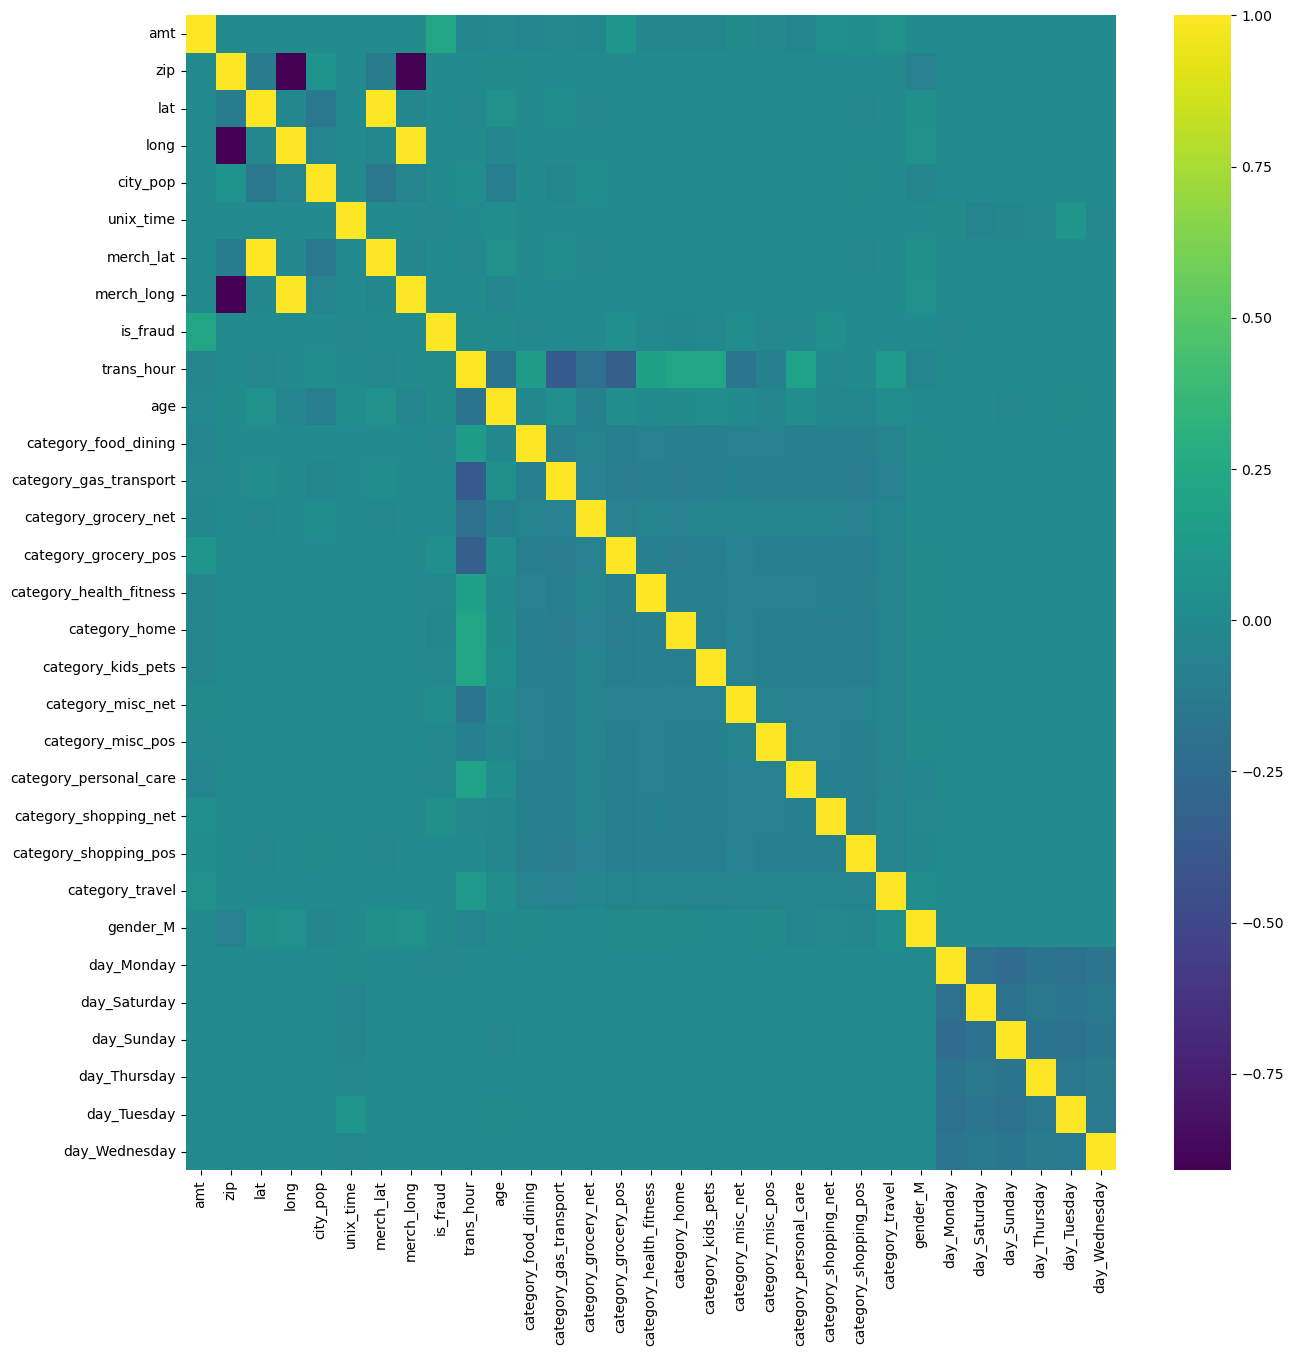

In [150]:
df_numeric = df1.select_dtypes(include=['number']) 
df_random_under_corr = df_numeric.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr, cmap="viridis")
plt.show()

In [151]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr

In [152]:
df_numeric = df1.select_dtypes(include=['number']) 
corr_features = correlation(df_numeric,0.85)
corr_features

{'merch_lat', 'merch_long'}

- As it can be seen, there are no features that have a correlation of above 85% apart from merchant lat and long. Hence, it is safe to proceed with out model building.

# **Step - 5: Model Training and Selection**

In [155]:
df_num = df1.select_dtypes(include='number')
df_num.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],
            axis=1, inplace=True)


In [156]:
df_num['trans_hour'].dtypes

dtype('int32')

In [157]:
df_num

amt  is_fraud  trans_hour   age  category_food_dining  \
0         4.97         0           0  31.0                     0   
1       107.23         0           0  41.0                     0   
2       220.11         0           0  57.0                     0   
3        45.00         0           0  52.0                     0   
4        41.96         0           0  33.0                     0   
...        ...       ...         ...   ...                   ...   
110268  104.25         0           8  54.0                     0   
259178   89.37         0          15  65.0                     0   
365838    5.07         0           3  52.0                     0   
131932  201.98         0           7  30.0                     0   
121958   66.76         0           2  61.0                     0   

        category_gas_transport  category_grocery_net  category_grocery_pos  \
0                            0                     0                     0   
1                            0                     0                     1   
2                            0                     0                     0   
3                            1                     0                     0   
4                            0                     0                     0   
...                        ...                   ...                   ...   
110268                       0                     0                     1   
259178                       0                     0                     0   
365838                       0                     0                     0   
131932                       0                     0                     1   
121958                       0                     0                     0   

        category_health_fitness  category_home  ...  category_shopping_net  \
0                             0              0  ...                      0   
1                             0              0  ...                      0   
2                             0              0  ...                      0   
3                             0              0  ...                      0   
4                             0              0  ...                      0   
...                         ...            ...  ...                    ...   
110268                        0              0  ...                      0   
259178                        0              1  ...                      0   
365838                        0              0  ...                      0   
131932                        0              0  ...                      0   
121958                        0              0  ...                      0   

        category_shopping_pos  category_travel  gender_M  day_Monday  \
0                           0                0         0           0   
1                           0                0         0           0   
2                           0                0         1           0   
3                           0                0         1           0   
4                           0                0         1           0   
...                       ...              ...       ...         ...   
110268                      0                0         0           0   
259178                      0                0         1           0   
365838                      0                0         0           0   
131932                      0                0         0           0   
121958                      0                0         1           1   

        day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  
0                  0           0             0            1              0  
1                  0           0             0            1              0  
2                  0           0             0            1              0  
3                  0           0             0            1              0  
4                  0           0             0            1           

In [158]:
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [159]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_)  # Fit & transform training data
X_test = scaler.transform(X_test_)  # Transform test data using same scaler

## **Logistic Regression**

In [161]:
lr = LogisticRegression(random_state=42)

In [162]:
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test_)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [1 1 1 ... 1 1 1]


C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [163]:
model_name = 'Logistic Regression - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred) 

recall = metrics.recall_score(y_test,y_test_pred)

model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

Model Name  Training Score  Testing Score  \
0  Logistic Regression - without balancing        0.994181       0.994208   

   Accuracy  F1 Score  Precision  Recall  
0  0.005443  0.000059   0.005443     1.0

### **Impacts of Imbalance:**
- From the above dataframe it can be seen that although we have not balanced the classes in our target variable, the accuracy and several other metrics seem to look great.
- This is because, since there is no balance in the dataset at this point, the model predicts almost all data points as 'not fraud'.
- This does not clearly satify our motive hence, we need to balance the classes in the target variable in order build a fair model.

In [165]:
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

is_fraud
0    0.994557
1    0.005443
Name: proportion, dtype: float64

In [166]:
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (8569, 24)
non fraud data shape:  (1565965, 24)
Fraud Data percentage:  0.5472025236834795


In [167]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[     0 313193]
 [     0   1714]]


C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    313193
           1       0.01      1.00      0.01      1714

    accuracy                           0.01    314907
   macro avg       0.00      0.50      0.01    314907
weighted avg       0.00      0.01      0.00    314907



C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **1) Random Undersampling:**
- *for this, we will use the sample method to randomly choose the total number of data points from majority class as in the minority class.*

In [169]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus
)

In [171]:
lrr = LogisticRegression(random_state=42)
model = lrr.fit(X_train, y_train)

In [172]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [173]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2057
           1       0.85      0.75      0.80      2056

    accuracy                           0.81      4113
   macro avg       0.81      0.81      0.81      4113
weighted avg       0.81      0.81      0.81      4113



In [174]:
model_name = 'Logistic Regression - with balancing'
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [175]:
evaluate_df = pd.DataFrame(
    [[model_name, train_score, test_score, acc_score, f_score, precision, recall]],
    columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
             'F1 Score', 'Precision', 'Recall']
)

In [176]:
evaluate_df

Model Name  Training Score  Testing Score  \
0  Logistic Regression - with balancing        0.823695       0.808899   

   Accuracy  F1 Score  Precision    Recall  
0  0.808899  0.808254   0.849285  0.750973

### **2) SMOTE**

In [178]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

In [180]:
lrs = LogisticRegression(random_state=42)
model = lrs.fit(X_train, y_train)

In [181]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [182]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1253  187]
 [ 346 1094]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1440
           1       0.85      0.76      0.80      1440

    accuracy                           0.81      2880
   macro avg       0.82      0.81      0.81      2880
weighted avg       0.82      0.81      0.81      2880



In [183]:
# Evaluation Metrics
model_name = 'Logistic Regression - with SMOTE'
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [184]:
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy', 
                                                      'F1 Score', 'Precision', 'Recall'])
evaluate_df

Model Name  Training Score  Testing Score  Accuracy  \
0  Logistic Regression - with SMOTE        0.824501       0.814931  0.814931   

   F1 Score  Precision    Recall  
0  0.814365    0.85402  0.759722

## **Random Forest**

In [186]:
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(X_train, y_train)

In [187]:
y_test_pred_rf = model_rf.predict(X_test)

In [188]:
model_eval_data = [[
    "Random Forest - Without Balancing",
    model_rf.score(X_train, y_train),
    model_rf.score(X_test, y_test),
    accuracy_score(y_test, y_test_pred_rf),
    f1_score(y_test, y_test_pred_rf, average="weighted"),
    precision_score(y_test, y_test_pred_rf),
    recall_score(y_test, y_test_pred_rf),
]]

In [189]:
model_eval_data

[['Random Forest - Without Balancing',
  1.0,
  0.9711805555555556,
  0.9711805555555556,
  0.9711802741129199,
  0.9741439552760307,
  0.9680555555555556]]

In [190]:
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred_rf)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1403   37]
 [  46 1394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1440
           1       0.97      0.97      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



### **1) Random UnderSampling**

In [192]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [193]:
rf_rus = RandomForestClassifier(random_state=42)
model_rus = rf_rus.fit(X_rus, y_rus)
y_test_pred_rus = model_rus.predict(X_test)

In [194]:
model_eval_data.append([
    "Random Forest - With Random Undersampling",
    model_rus.score(X_rus, y_rus),
    model_rus.score(X_test, y_test),
    accuracy_score(y_test, y_test_pred_rus),
    f1_score(y_test, y_test_pred_rus, average="weighted"),
    precision_score(y_test, y_test_pred_rus),
    recall_score(y_test, y_test_pred_rus),
])

In [195]:
model_eval_data

[['Random Forest - Without Balancing',
  1.0,
  0.9711805555555556,
  0.9711805555555556,
  0.9711802741129199,
  0.9741439552760307,
  0.9680555555555556],
 ['Random Forest - With Random Undersampling',
  1.0,
  0.9725694444444445,
  0.9725694444444445,
  0.9725690442773868,
  0.9762071378586424,
  0.96875]]

In [196]:
conf_matrix = confusion_matrix(y_test, y_test_pred_rus)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rus))

Confusion Matrix:
 [[1406   34]
 [  45 1395]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1440
           1       0.98      0.97      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



### **2) SWOT**

In [198]:
smote_rf = SMOTE(random_state=42)
X_smote, y_smote = smote_rf.fit_resample(X_train, y_train)

In [199]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on original train data
X_smote_scaled = scaler.transform(X_smote)  # Transform SMOTE data
X_test_scaled = scaler.transform(X_test)  # Transform test data

In [200]:
# Train model with correctly scaled data
rf_smote = RandomForestClassifier(random_state=42)
model_smote = rf_smote.fit(X_smote_scaled, y_smote)

# Predict on correctly scaled test data
y_test_pred_smote = model_smote.predict(X_test_scaled)

In [201]:
y_test_pred_smote = model_smote.predict(X_test_scaled)
y_test_use = y_test_pred_smote
y_use = y_smote

In [202]:
model_eval_data.append([
    "Random Forest - With SMOTE",
    model_smote.score(X_smote_scaled, y_smote),  # Train accuracy (use X_smote_scaled)
    model_smote.score(X_test_scaled, y_test),  # Test accuracy (use X_test_scaled)
    accuracy_score(y_test, y_test_pred_smote),
    f1_score(y_test, y_test_pred_smote, average="weighted"),
    precision_score(y_test, y_test_pred_smote, zero_division=1),
    recall_score(y_test, y_test_pred_smote),
])

In [203]:
evaluate_df = pd.DataFrame(
    model_eval_data, 
    columns=["Model Name", "Training Score", "Testing Score", "Accuracy", "F1 Score", "Precision", "Recall"]
)

In [204]:
conf_matrix = confusion_matrix(y_test, y_test_pred_smote)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred_smote)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1403   37]
 [  44 1396]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1440
           1       0.97      0.97      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



In [205]:
evaluate_df

Model Name  Training Score  Testing Score  \
0          Random Forest - Without Balancing             1.0       0.971181   
1  Random Forest - With Random Undersampling             1.0       0.972569   
2                 Random Forest - With SMOTE             1.0       0.971875   

   Accuracy  F1 Score  Precision    Recall  
0  0.971181  0.971180   0.974144  0.968056  
1  0.972569  0.972569   0.976207  0.968750  
2  0.971875  0.971875   0.974180  0.969444

## **HyperTuning**

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees
    'max_depth': [10, 20, None],      # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples per split
    'min_samples_leaf': [1, 2, 4]     # Min samples per leaf
}

In [209]:
X_train

array([[ 6.81079033, -1.87913363,  0.04809279, ..., -0.35604011,
        -0.39788413,  3.00040628],
       [ 5.70548369, -1.58573159, -0.75596494, ..., -0.35604011,
        -0.39788413, -0.3332882 ],
       [ 2.55019548,  1.34828881,  1.42647747, ..., -0.35604011,
        -0.39788413, -0.3332882 ],
       ...,
       [-0.25292637, -1.14562853, -0.58366686, ...,  2.80867234,
        -0.39788413, -0.3332882 ],
       [ 1.39767422, -1.87913363, -1.38772459, ...,  2.80867234,
        -0.39788413, -0.3332882 ],
       [ 5.77519058,  1.49498983,  2.00080442, ..., -0.35604011,
        -0.39788413, -0.3332882 ]])

In [210]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [211]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [212]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [213]:
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [214]:
y_test_pred = best_rf.predict(X_test)

In [215]:
acc_score = accuracy_score(y_test, y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [216]:
model_eval_data = [['Random Forest - Tuned', grid_search.best_score_, acc_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                                     'F1 Score', 'Precision', 'Recall'])

In [217]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1404   36]
 [  59 1381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1440
           1       0.97      0.96      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



In [218]:
evaluate_df

Model Name  Training Score  Testing Score  Accuracy  F1 Score  \
0  Random Forest - Tuned        0.973653       0.967014  0.967014  0.967012   

   Precision    Recall  
0   0.974594  0.959028

## **XG Boost**

In [220]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [221]:
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [222]:
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

In [223]:
model_name = 'XGBoost - Without Balancing'
train_score = xgb_clf.score(X_train, y_train)
test_score = xgb_clf.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [224]:
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]

In [225]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1404   36]
 [  43 1397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1440
           1       0.97      0.97      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



### **SMOTE Sampling**

In [227]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [228]:
xgb_clf_smote = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf_smote.fit(X_train_smote, y_train_smote)

C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [229]:
y_test_pred_smote = xgb_clf_smote.predict(X_test)

In [230]:
model_name = 'XGBoost - With SMOTE'
train_score = xgb_clf_smote.score(X_train_smote, y_train_smote)
test_score = xgb_clf_smote.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_test_pred_smote)
f_score = f1_score(y_test, y_test_pred_smote, average='weighted')
precision = precision_score(y_test, y_test_pred_smote)
recall = recall_score(y_test, y_test_pred_smote)

In [231]:
model_eval_data.append([model_name, train_score, test_score, acc_score, f_score, precision, recall])

In [232]:
conf_matrix = confusion_matrix(y_test, y_test_pred_smote)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_test_pred_smote)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1404   36]
 [  43 1397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1440
           1       0.97      0.97      0.97      1440

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880



### **RandomUnder Sampling**

In [234]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [235]:
xgb_clf_rus = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf_rus.fit(X_train_rus, y_train_rus)

C:\Users\Yashvi Sharma\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [236]:
y_test_pred_rus = xgb_clf_rus.predict(X_test)

model_name = 'XGBoost - With Random Undersampling'
train_score = xgb_clf_rus.score(X_train_rus, y_train_rus)
test_score = xgb_clf_rus.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_test_pred_rus)
f_score = f1_score(y_test, y_test_pred_rus, average='weighted')
precision = precision_score(y_test, y_test_pred_rus)
recall = recall_score(y_test, y_test_pred_rus)

In [237]:
model_eval_data.append([model_name, train_score, test_score, acc_score, f_score, precision, recall])

In [238]:
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                                      'F1 Score', 'Precision', 'Recall'])

In [239]:
evaluate_df

Model Name  Training Score  Testing Score  \
0          XGBoost - Without Balancing        0.998214       0.972569   
1                 XGBoost - With SMOTE        0.998214       0.972569   
2  XGBoost - With Random Undersampling        0.998214       0.972569   

   Accuracy  F1 Score  Precision    Recall  
0  0.972569  0.972569   0.974878  0.970139  
1  0.972569  0.972569   0.974878  0.970139  
2  0.972569  0.972569   0.974878  0.970139

## **Decision Tree**

In [241]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [242]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [243]:
dt_preds = dt_clf.predict(X_test)

In [244]:
conf_matrix = confusion_matrix(y_test, dt_preds)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, dt_preds)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1387   53]
 [  49 1391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1440
           1       0.96      0.97      0.96      1440

    accuracy                           0.96      2880
   macro avg       0.96      0.96      0.96      2880
weighted avg       0.96      0.96      0.96      2880



### **RandomUnder Sampling**

In [246]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [247]:
dt_rus = DecisionTreeClassifier(random_state=42)
dt_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(random_state=42)

In [248]:
y_pred_rus = dt_rus.predict(X_test)

In [249]:
rus_results = {
    "Method": "RUS (UnderSampling)",
    "Accuracy": accuracy_score(y_test, y_pred_rus),
    "Precision": precision_score(y_test, y_pred_rus),
    "Recall": recall_score(y_test, y_pred_rus),
    "F1-Score": f1_score(y_test, y_pred_rus)
}

In [250]:
conf_matrix = confusion_matrix(y_test, y_pred_rus)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rus))

Confusion Matrix:
 [[1387   53]
 [  49 1391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1440
           1       0.96      0.97      0.96      1440

    accuracy                           0.96      2880
   macro avg       0.96      0.96      0.96      2880
weighted avg       0.96      0.96      0.96      2880



### **SMOTE**

In [252]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [253]:
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [254]:
y_pred_smote = dt_smote.predict(X_test)

In [255]:
y_pred_smote_ = dt_smote.predict(X_train_smote)

In [256]:
smote_results = {
    "Method": "SMOTE (OverSampling)",
    "Accuracy": accuracy_score(y_test, y_pred_smote),
    "Precision": precision_score(y_test, y_pred_smote),
    "Recall": recall_score(y_test, y_pred_smote),
    "F1-Score": f1_score(y_test, y_pred_smote)
}

In [257]:
evaluate_df = pd.DataFrame([rus_results, smote_results])
print(evaluate_df)

                 Method  Accuracy  Precision    Recall  F1-Score
0   RUS (UnderSampling)  0.964583   0.963296  0.965972  0.964632
1  SMOTE (OverSampling)  0.964583   0.963296  0.965972  0.964632


In [258]:
conf_matrix = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred_smote)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1387   53]
 [  49 1391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1440
           1       0.96      0.97      0.96      1440

    accuracy                           0.96      2880
   macro avg       0.96      0.96      0.96      2880
weighted avg       0.96      0.96      0.96      2880



# **Step- 6 Deploy Model**

In [ ]:
import pickle

In [ ]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)